In [0]:
import pandas as pd
import numpy as np
import os
import datetime


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
len(np.unique(y_train))

43

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
model = Sequential([
  Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax')
])

#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 8s 7ms/step - loss: 13.2662 - accuracy: 0.7570


In [0]:
 def get_cnn_v1(input_shape, num_classes):
  return Sequential([
  Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax')
])
  
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size, 128'),
      epochs=params_fit.get('epochs',5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
    )
  
  return model

In [0]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
1088/1088 [==============================] - 11s 10ms/step - loss: 8.0460 - accuracy: 0.7628 - val_loss: 0.3560 - val_accuracy: 0.9164
Epoch 2/5
1088/1088 [==============================] - 10s 10ms/step - loss: 0.3426 - accuracy: 0.9263 - val_loss: 0.1917 - val_accuracy: 0.9558
Epoch 3/5
1088/1088 [==============================] - 10s 10ms/step - loss: 0.3172 - accuracy: 0.9346 - val_loss: 0.2068 - val_accuracy: 0.9541
Epoch 4/5
1088/1088 [==============================] - 10s 10ms/step - loss: 0.2836 - accuracy: 0.9437 - val_loss: 0.2062 - val_accuracy: 0.9609
Epoch 5/5
1088/1088 [==============================] - 10s 10ms/step - loss: 0.2526 - accuracy: 0.9508 - val_loss: 0.1927 - val_accuracy: 0.9636


In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):


  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [0]:
predict(model_trained, X_test, y_test)

0.8170068027210884

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [0]:
 def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])



train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
1088/1088 [==============================] - 15s 13ms/step - loss: 2.8145 - accuracy: 0.4955 - val_loss: 0.4873 - val_accuracy: 0.8627
Epoch 2/5
1088/1088 [==============================] - 14s 13ms/step - loss: 0.6039 - accuracy: 0.8263 - val_loss: 0.1846 - val_accuracy: 0.9542
Epoch 3/5
1088/1088 [==============================] - 14s 13ms/step - loss: 0.4200 - accuracy: 0.8813 - val_loss: 0.1160 - val_accuracy: 0.9650
Epoch 4/5
1088/1088 [==============================] - 14s 13ms/step - loss: 0.3567 - accuracy: 0.8996 - val_loss: 0.1505 - val_accuracy: 0.9551
Epoch 5/5
1088/1088 [==============================] - 14s 13ms/step - loss: 0.3466 - accuracy: 0.9059 - val_loss: 0.0838 - val_accuracy: 0.9757


0.9111111111111111

In [0]:
 def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])



train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
1088/1088 [==============================] - 19s 17ms/step - loss: 1.1063 - accuracy: 0.7142 - val_loss: 0.1338 - val_accuracy: 0.9697
Epoch 2/5
1088/1088 [==============================] - 18s 17ms/step - loss: 0.2760 - accuracy: 0.9183 - val_loss: 0.0857 - val_accuracy: 0.9740
Epoch 3/5
1088/1088 [==============================] - 19s 17ms/step - loss: 0.2019 - accuracy: 0.9432 - val_loss: 0.0338 - val_accuracy: 0.9913
Epoch 4/5
1088/1088 [==============================] - 19s 17ms/step - loss: 0.1478 - accuracy: 0.9589 - val_loss: 0.0312 - val_accuracy: 0.9905
Epoch 5/5
1088/1088 [==============================] - 18s 17ms/step - loss: 0.1498 - accuracy: 0.9597 - val_loss: 0.0282 - val_accuracy: 0.9917


0.9609977324263038

In [0]:
 def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])


#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
1088/1088 [==============================] - 21s 20ms/step - loss: 1.9500 - accuracy: 0.4375 - val_loss: 0.4739 - val_accuracy: 0.8555
Epoch 2/5
1088/1088 [==============================] - 21s 20ms/step - loss: 0.5889 - accuracy: 0.8137 - val_loss: 0.1510 - val_accuracy: 0.9540
Epoch 3/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.3605 - accuracy: 0.8919 - val_loss: 0.0983 - val_accuracy: 0.9697
Epoch 4/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.2881 - accuracy: 0.9158 - val_loss: 0.0657 - val_accuracy: 0.9815
Epoch 5/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.2457 - accuracy: 0.9288 - val_loss: 0.0628 - val_accuracy: 0.9798


0.9498866213151927

In [0]:
 def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])


#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
1088/1088 [==============================] - 23s 21ms/step - loss: 1.5970 - accuracy: 0.5401 - val_loss: 0.2784 - val_accuracy: 0.9132
Epoch 2/5
1088/1088 [==============================] - 23s 21ms/step - loss: 0.4512 - accuracy: 0.8657 - val_loss: 0.1247 - val_accuracy: 0.9626
Epoch 3/5
1088/1088 [==============================] - 23s 21ms/step - loss: 0.3240 - accuracy: 0.9064 - val_loss: 0.0867 - val_accuracy: 0.9744
Epoch 4/5
1088/1088 [==============================] - 23s 21ms/step - loss: 0.2799 - accuracy: 0.9224 - val_loss: 0.0773 - val_accuracy: 0.9789
Epoch 5/5
1088/1088 [==============================] - 23s 21ms/step - loss: 0.2671 - accuracy: 0.9294 - val_loss: 0.0626 - val_accuracy: 0.9819


0.9709750566893424

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [0]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
1088/1088 [==============================] - 23s 21ms/step - loss: 1.5761 - accuracy: 0.5382 - val_loss: 0.2725 - val_accuracy: 0.9163
Epoch 2/5
1088/1088 [==============================] - 23s 21ms/step - loss: 0.3316 - accuracy: 0.8961 - val_loss: 0.0706 - val_accuracy: 0.9782
Epoch 3/5
1088/1088 [==============================] - 23s 21ms/step - loss: 0.2034 - accuracy: 0.9367 - val_loss: 0.0576 - val_accuracy: 0.9811
Epoch 4/5
1088/1088 [==============================] - 23s 21ms/step - loss: 0.1664 - accuracy: 0.9504 - val_loss: 0.0654 - val_accuracy: 0.9791
Epoch 5/5
1088/1088 [==============================] - 23s 21ms/step - loss: 0.1455 - accuracy: 0.9566 - val_loss: 0.0309 - val_accuracy: 0.9916


0.9714285714285714

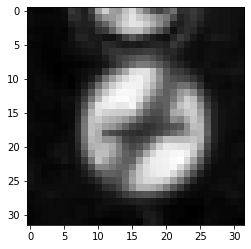

In [0]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:,:,2] = exposure.equalize_adapthist(hsv[:,:,2])
  img = color.hsv2rgb(hsv)

  return img

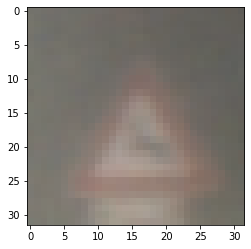

In [0]:
plt.imshow(X_train[400])

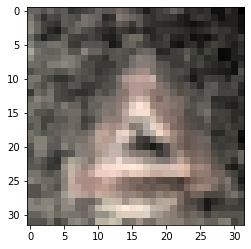

In [0]:
plt.imshow(preproc_img(X_train[400]))

In [0]:
X_train_prp = X_train.copy().astype(np.float32)
X_test_prp = X_test.copy().astype(np.float32)

for i in tqdm(range(X_train.shape[0])):
  X_train_prp[i] = preproc_img(X_train[i])

In [0]:
plt.bar(range(43),y_pred_prob[400])

NameError: ignored

In [0]:
np.argmax(y_pred_prob[400])

1

In [0]:
labels_dict[np.argmax(y_pred_prob[400])]

'Speed limit (30km/h)'

In [0]:
labels_dict[1]

'Speed limit (30km/h)'

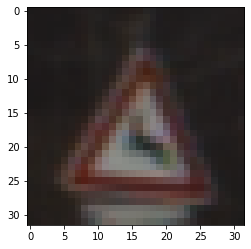

In [0]:
plt.imshow(X_test[100])

In [0]:
--19:15